# Proyecto Wallapop

## 1. Importar bibliotecas y cargar el conjunto de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np



In [2]:
df = pd.read_csv('D:/Proyecto ironhack/files/spain_dataset.csv')
df.head()

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\4099989062.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/Proyecto ironhack/files/spain_dataset.csv')


,id,type,content_id,title,storytelling,distance,user_id,kind,flag_pending,flag_sold,...,engine,gearbox,horsepower,favorited,creation_date,modification_date,supports_shipping,location.city,location.postal_code,location.country_code
0,4z4eqpmqwvjy,cars_search_cars,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Eléctrico,automatic,261.0,False,2024-08-01T00:19:05.242+00:00,2024-08-06T11:00:26.671+00:00,False,Granada,18014,ES
1,qjw4qk8wpgzo,cars_search_cars,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Gasolina,automatic,150.0,False,2024-08-02T00:15:58.196+00:00,2024-08-06T11:00:26.800+00:00,False,Granada,18014,ES
2,36e1el0ekqjd,cars_search_cars,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Gasolina,manual,95.0,False,2024-08-01T00:16:50.623+00:00,2024-08-06T11:00:27.227+00:00,False,Granada,18014,ES
3,4z4eqpmqxwjy,cars_search_cars,4z4eqpmqxwjy,Mercedes-Benz Clase CLA CLA 250 e 160 kW (218 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Eléctrico,automatic,218.0,False,2024-08-01T00:17:33.186+00:00,2024-08-06T11:00:26.633+00:00,False,Granada,18014,ES
4,36e1e2k4g8jd,cars_search_cars,36e1e2k4g8jd,Volkswagen Touran Advance 2.0 TDI 110 kW (150 ...,"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",5.0,xzo87r5ny769,normal,False,False,...,Diésel,automatic,150.0,False,2024-08-02T00:10:10.926+00:00,2024-08-06T11:00:26.709+00:00,False,Granada,18014,ES


In [3]:
# Convertir la columna 'listings' de string a diccionario
# df['listings'] = df['listings'].apply(ast.literal_eval)

# Normalizar los datos JSON para expandir los diccionarios en columnas
# df = pd.json_normalize(df['listings'])

In [4]:
df.shape

(101452, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101452 entries, 0 to 101451
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     101452 non-null  object 
 1   type                   101452 non-null  object 
 2   content_id             101452 non-null  object 
 3   title                  101452 non-null  object 
 4   storytelling           97914 non-null   object 
 5   distance               101452 non-null  float64
 6   user_id                101452 non-null  object 
 7   kind                   101452 non-null  object 
 8   flag_pending           101452 non-null  bool   
 9   flag_sold              101452 non-null  bool   
 10  flag_reserved          101452 non-null  bool   
 11  flag_banned            101452 non-null  bool   
 12  flag_expired           101452 non-null  bool   
 13  flag_onhold            101452 non-null  bool   
 14  flag_bumped            101452 non-nu

In [6]:
# Indentificamos los tipos de datos de las columnas.
df.dtypes

id                        object
type                      object
content_id                object
title                     object
storytelling              object
distance                 float64
user_id                   object
kind                      object
flag_pending                bool
flag_sold                   bool
flag_reserved               bool
flag_banned                 bool
flag_expired                bool
flag_onhold                 bool
flag_bumped                 bool
flag_highlighted            bool
flag_urgent                 bool
flag_country_bumped         bool
flag_boosted                bool
price                    float64
currency                  object
web_slug                  object
category_id                int64
brand                     object
model                     object
year                     float64
version                   object
km                       float64
engine                    object
gearbox                   object
horsepower

In [7]:
df.columns

Index(['id', 'type', 'content_id', 'title', 'storytelling', 'distance',
       'user_id', 'kind', 'flag_pending', 'flag_sold', 'flag_reserved',
       'flag_banned', 'flag_expired', 'flag_onhold', 'flag_bumped',
       'flag_highlighted', 'flag_urgent', 'flag_country_bumped',
       'flag_boosted', 'price', 'currency', 'web_slug', 'category_id', 'brand',
       'model', 'year', 'version', 'km', 'engine', 'gearbox', 'horsepower',
       'favorited', 'creation_date', 'modification_date', 'supports_shipping',
       'location.city', 'location.postal_code', 'location.country_code'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,101452.0,10.027106,3.587988e+00,1.0,8.0,10.0,13.0,15.0
price,101452.0,27757.611130,2.479706e+06,0.0,7700.0,14008.5,20490.0,602870597.0
category_id,101452.0,100.000000,0.000000e+00,100.0,100.0,100.0,100.0,100.0
year,101446.0,2014.853479,1.059772e+02,0.0,2011.0,2018.0,2021.0,20011.0
km,98441.0,123068.375910,7.115605e+05,0.0,51992.0,92970.0,153000.0,140000000.0
horsepower,98767.0,333.948522,3.392385e+04,-2.0,102.0,125.0,150.0,10100120.0


## 3. Limpieza de datos

In [9]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'id',
    'type',
    'flag_pending',
    'flag_sold',
    'flag_banned',
    'flag_expired',
    'flag_onhold',
    'flag_highlighted',
    'flag_urgent',
    'flag_boosted',
    'supports_shipping',
    'web_slug',
    'favorited',
    'kind',
    'category_id',
    'distance'
]

# Eliminación de las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)



In [10]:
df.columns

Index(['content_id', 'title', 'storytelling', 'user_id', 'flag_reserved',
       'flag_bumped', 'flag_country_bumped', 'price', 'currency', 'brand',
       'model', 'year', 'version', 'km', 'engine', 'gearbox', 'horsepower',
       'creation_date', 'modification_date', 'location.city',
       'location.postal_code', 'location.country_code'],
      dtype='object')

In [11]:

# Convertir las columnas a tipo datetime
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['modification_date'] = pd.to_datetime(df['modification_date'])

# Formatear las fechas para que solo muestren año, mes y día
df['creation_date'] = df['creation_date'].dt.strftime('%Y-%m-%d')
df['modification_date'] = df['modification_date'].dt.strftime('%Y-%m-%d')

# Verificar el resultado
df[['creation_date', 'modification_date']].head()




,creation_date,modification_date
0,2024-08-01,2024-08-06
1,2024-08-02,2024-08-06
2,2024-08-01,2024-08-06
3,2024-08-01,2024-08-06
4,2024-08-02,2024-08-06


In [12]:
# Diccionario de ejemplo de códigos postales a provincias (España como ejemplo)
postal_code_to_province = {
    '01': 'Álava', '02': 'Albacete', '03': 'Alicante', '04': 'Almería',
    '05': 'Ávila', '06': 'Badajoz', '07': 'Baleares', '08': 'Barcelona',
    '09': 'Burgos', '10': 'Cáceres', '11': 'Cádiz', '12': 'Castellón',
    '13': 'Ciudad Real', '14': 'Córdoba', '15': 'La Coruña', '16': 'Cuenca',
    '17': 'Gerona', '18': 'Granada', '19': 'Guadalajara', '20': 'Guipúzcoa',
    '21': 'Huelva', '22': 'Huesca', '23': 'Jaén', '24': 'León',
    '25': 'Lérida', '26': 'La Rioja', '27': 'Lugo', '28': 'Madrid',
    '29': 'Málaga', '30': 'Murcia', '31': 'Navarra', '32': 'Orense',
    '33': 'Asturias', '34': 'Palencia', '35': 'Las Palmas', '36': 'Pontevedra',
    '37': 'Salamanca', '38': 'Santa Cruz de Tenerife', '39': 'Cantabria',
    '40': 'Segovia', '41': 'Sevilla', '42': 'Soria', '43': 'Tarragona',
    '44': 'Teruel', '45': 'Toledo', '46': 'Valencia', '47': 'Valladolid',
    '48': 'Vizcaya', '49': 'Zamora', '50': 'Zaragoza', '51': 'Ceuta',
    '52': 'Melilla'
}

# Función para extraer la provincia
def get_province(postal_code):
    postal_code_str = str(postal_code).zfill(5)  # Asegurar que tenga 5 dígitos
    province_code = postal_code_str[:2]  # Extraer los primeros dos dígitos
    return postal_code_to_province.get(province_code, 'Desconocido')

# Aplicar la función a la columna de códigos postales
df['location.province'] = df['location.postal_code'].apply(get_province)

# Mostrar los primeros registros para verificar
df[['location.postal_code', 'location.province']].head()


,location.postal_code,location.province
0,18014,Granada
1,18014,Granada
2,18014,Granada
3,18014,Granada
4,18014,Granada


In [13]:
df

,content_id,title,storytelling,user_id,flag_reserved,flag_bumped,flag_country_bumped,price,currency,brand,...,km,engine,gearbox,horsepower,creation_date,modification_date,location.city,location.postal_code,location.country_code,location.province
0,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,25890.0,EUR,Lynk & Co,...,39973.0,Eléctrico,automatic,261.0,2024-08-01,2024-08-06,Granada,18014,ES,Granada
1,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,24790.0,EUR,CUPRA,...,18900.0,Gasolina,automatic,150.0,2024-08-02,2024-08-06,Granada,18014,ES,Granada
2,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,18290.0,EUR,Volkswagen,...,29994.0,Gasolina,manual,95.0,2024-08-01,2024-08-06,Granada,18014,ES,Granada
3,4z4eqpmqxwjy,Mercedes-Benz Clase CLA CLA 250 e 160 kW (218 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,33890.0,EUR,Mercedes-Benz,...,93279.0,Eléctrico,automatic,218.0,2024-08-01,2024-08-06,Granada,18014,ES,Granada
4,36e1e2k4g8jd,Volkswagen Touran Advance 2.0 TDI 110 kW (150 ...,"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,24890.0,EUR,Volkswagen,...,79934.0,Diésel,automatic,150.0,2024-08-02,2024-08-06,Granada,18014,ES,Granada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101447,nzx4m5n74mj2,Renault Kangoo 2008,"OCASIÓN, se vende Renault KANGOO, con revision...",mznl3mnn72jn,False,False,False,2000.0,EUR,Renault,...,320000.0,Diésel,manual,85.0,2024-08-07,2024-08-07,Tarrio,15189,ES,La Coruña
101448,8j342y552769,Hyundai Santa Fe 2008,NaN,v9jd7q5rmljk,False,False,False,5500.0,EUR,Hyundai,...,NaN,Diésel,manual,155.0,2024-08-07,2024-08-07,Ordes,15680,ES,La Coruña
101449,xzo2d8leol69,AUDI Q3 SLINE 40TDI 190CV QUATTRO STRONIC,"NS MOTOR, Centro Multimarca en Ordes, referent...",0j2wmxqq4vjy,False,False,False,33900.0,EUR,Audi,...,129000.0,Diésel,automatic,190.0,2024-08-07,2024-08-07,Leira,15689,ES,La Coruña
101450,pzp259yl34j3,VOLKSWAGEN TIGUAN RLINE EXTERIOR 150CV DSG,"NS MOTOR, Centro Multimarca en Ordes, referent...",0j2wmxqq4vjy,False,False,False,25900.0,EUR,Volkswagen,...,140000.0,Diésel,automatic,150.0,2024-08-07,2024-08-07,Leira,15689,ES,La Coruña


In [14]:
df['location.province'].unique()


array(['Granada', 'Badajoz', 'Albacete', 'Ciudad Real', 'Alicante',
       'Murcia', 'Valencia', 'Cáceres', 'Cádiz', 'Madrid', 'Guadalajara',
       'La Rioja', 'Córdoba', 'Desconocido', 'Jaén', 'Sevilla', 'Huelva',
       'Almería', 'Málaga', 'Pontevedra', 'Toledo', 'Cuenca', 'León',
       'Huesca', 'Castellón', 'Teruel', 'Ávila', 'Salamanca',
       'Santa Cruz de Tenerife', 'Tarragona', 'Segovia', 'Zaragoza',
       'Zamora', 'Valladolid', 'Lérida', 'Barcelona', 'Vizcaya', 'Soria',
       'Palencia', 'Navarra', 'Burgos', 'Gerona', 'Orense', 'Álava',
       'Lugo', 'La Coruña', 'Guipúzcoa', 'Asturias', 'Cantabria'],
      dtype=object)

In [15]:
df = df[df['year'] <= 2024]

In [16]:
# Convertir todos los nombres en la columna 'brand' a minúsculas y quitar espacios en blanco del final
df['brand'] = df['brand'].str.lower().str.strip()

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\4192356834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].str.lower().str.strip()


In [17]:
# Mantener solo la primera palabra de cada entrada en la columna 'brand'
# df['brand'] = df['brand'].str.split().str[0]

In [18]:
# Convertir a lista y mostrar todos los elementos
list(df['brand'].unique())

['lynk & co',
 'cupra',
 'volkswagen',
 'mercedes-benz',
 'mg',
 'bmw',
 'hyundai',
 'audi',
 'peugeot',
 'land rover',
 'mini',
 'renault',
 'fiat',
 'seat',
 'citroen',
 'opel',
 'alfa romeo',
 'ford',
 'kia',
 'nissan',
 'dacia',
 'porsche',
 'skoda',
 'toyota',
 'ssangyong',
 'subaru',
 'bentley',
 'jaguar',
 'mitsubishi',
 'jeep',
 'mazda',
 'man',
 'volvo',
 'infiniti',
 'tesla',
 'citroën',
 'ds',
 'smart',
 'ilusion',
 'ligier',
 'wolkswagen',
 'iveco',
 'knaus',
 'lexus',
 'chevrolet',
 'abarth',
 'daewoo',
 'mercedes benz',
 'dfsk',
 'mercedes',
 'piaggio',
 'saab',
 'audi a3',
 'renault megane',
 'suzuki',
 'renault clio',
 'honda',
 'maverick',
 'vespa',
 'camper mercedes vito',
 'aixam',
 'ford transit',
 'vw',
 'peugeot 308',
 'china',
 'microcar',
 'maserati',
 'burstner',
 'evo',
 'hymer',
 'bww',
 'dr automobiles',
 'minauto',
 'ibiza fr',
 'ds automobiles',
 'land-rover',
 'citroen c2 vts 1.6 120cv',
 'rover',
 'saangyong tivoli',
 'lada',
 'benimar',
 'mclouis',
 'as

In [19]:
unique_brands_count = df['brand'].nunique()
print(f"Cantidad de nombres únicos en la columna 'brand': {unique_brands_count}")


Cantidad de nombres únicos en la columna 'brand': 800


In [20]:
# Definir el diccionario de correcciones basado en tu lista
brand_corrections = {
    'lynk': ['lynk'],
    'cupra': ['cupra'],
    'volkswagen': ['golf','volkswagen', 'wolkswagen', 'vw', 'volkswagen golf', 'volkswagen passat', 'wolskvagen', 'wolswagen', 'volskwagen', 'volswagen', 'volswaguen'],
    'mercedes-benz': ['mercedes vans','mercedes-benz', 'mercedes', 'mercedes benz', 'mercedes-benz', 'mercedes-amg', 'mercedes_benz', 'mercedes_benza', 'mercedez', 'merecedes', 'mercde', 'mercedez', 'mercedes-benza'],
    'mg': ['mg'],
    'bmw': ['bmw', 'bww', 'bmw320'],
    'hyundai': ['hyundai', 'hyundai i30', 'hunday', 'hiunday','galloper'],
    'audi': ['audi', 'audi a3', 'audi a4', 'audi q5', 'audis3', 'audi.'],
    'peugeot': ['peugeot', 'peugoet', 'peugot', 'peugueot', 'peuu', 'peugeot 207', 'peugeot boxer', 'peugeot 307', 'peogeot', 'peugueot', 'pezziaoli'],
    'land rover': ['land rover', 'land rover range rover', 'land-rover', 'land_rover', 'rover'],
    'mini': ['mini', 'mini cooper', 'minauto'],
    'renault': ['renault', 'renault twingo', 'renaul clio', 'renualt', 'renault', 'renualt'],
    'fiat': ['fiat', 'fiat500', 'fiat grande punto', 'fiat ducato camper', 'fiat ducato 2.5 sofim'],
    'seat': ['seat', 'seat leon', 'seat ibiza', 'seat arona', 'seat toledo', 'seat cordoba', 'seat alhambra'],
    'citroen': ['citroen', 'citroën', 'citroen c3', 'citroen c4', 'cintroen'],
    'opel': ['opel', 'opel astra', 'opel corsa', 'opel insignia', 'oper'],
    'alfa romeo': ['alfa romeo', 'alfa'],
    'ford': ['ford', 'ford fiesta', 'ford focus', 'ford kuga', 'for'],
    'kia': ['kia', 'kia sportage','piaggio'],
    'nissan': ['nissan', 'nissan qashqai', 'nisan'],
    'dacia': ['dacia'],
    'porsche': ['porsche', 'porche'],
    'skoda': ['skoda', 'scoda', 'škoda'],
    'toyota': ['toyota', 'toyota corolla', 'toyota yaris', 'toyta'],
    'ssangyong': ['ssangyong', 'ssangyong tivoli', 'saangyong'],
    'subaru': ['subaru'],
    'honda': ['honda', 'honda civic', 'hoda'],
    'aston martin': ['aston martin', 'aston'],
    'chevrolet': ['chevrolet'],
    'jaguar': ['jaguar'],
    'ds': ['ds', 'ds automobiles'],
    'smart': ['smart'],
    'dacia': ['dacia'],
    'skoda': ['skoda'],
    'porsche': ['porsche'],
    'mg': ['mg'],
    'alfa romeo': ['alfa romeo'],
    'dodge': ['dodge'],
    'abarth': ['abarth'],
    'tata': ['tata'],
    'man': ['man'],
    'saab': ['saab'],
    'aixam': ['aixam'],
    'ligier': ['ligier'],
    'microcar': ['microcar'],
    'dr': ['dr', 'dr automobiles'],
    'lamborghini': ['lamborghini'],
    'ferrari': ['ferrari'],
    'chrysler': ['chrysler', 'crysler', 'crhysler'],
    'bentley': ['bentley'],
    'adria': ['adria'],
}

# Aplanar el diccionario de correcciones para usarlo en el reemplazo
flat_dict = {item: key for key, values in brand_corrections.items() for item in values}

# Reemplazar las marcas incorrectas con las correctas
df['corrected_brand'] = df['brand'].replace(flat_dict)

# Verificar los resultados
df[['brand', 'corrected_brand']].head(10)


C:\Users\marco\AppData\Local\Temp\ipykernel_13248\170719140.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corrected_brand'] = df['brand'].replace(flat_dict)


,brand,corrected_brand
0,lynk & co,lynk & co
1,cupra,cupra
2,volkswagen,volkswagen
3,mercedes-benz,mercedes-benz
4,volkswagen,volkswagen
5,lynk & co,lynk & co
6,mg,mg
7,bmw,bmw
8,hyundai,hyundai
9,audi,audi


In [21]:
len(df['corrected_brand'].drop_duplicates())

735

In [22]:
len(df['brand'].drop_duplicates())

800

In [23]:
'dr'

'dr'

In [24]:
# Lista de marcas permitidas
allowed_brands = [
    "volkswagen", "peugeot", "bmw", "mercedes-benz", "citroen", "renault", "seat", "ford", 
    "audi", "opel", "fiat", "nissan", "kia", "hyundai", "toyota", "skoda", "mazda", "mini", 
    "dacia", "land rover", "volvo", "jeep", "cupra", "mitsubishi", "honda", "suzuki", 
    "porsche", "alfa romeo", "mg", "lexus", "jaguar", "ds", "smart", "lynk & co", "chevrolet", 
    "ssangyong", "subaru", "abarth", "tesla", "dr", "infiniti", "chrysler", "ligier", "daewoo", 
    "aixam", "maserati", "saab", "lancia", "dodge", "evo", "microcar", "man", 
    "chatenet", "dfsk", "bentley", "tata", "lamborghini", "ferrari", 
    "swm", "burstner", "mclouis", "cadillac", 
    "hummer", "pontiac", "mahindra"
]

# Crear un diccionario de reemplazo con marcas permitidas
replacement_dict = {brand: brand for brand in allowed_brands}

# Mapear la columna 'corrected_brand' usando el diccionario de reemplazo
df['corrected_brand'] = df['corrected_brand'].map(replacement_dict)

# Reemplazar los valores que no están en el diccionario con NaN
df['corrected_brand'] = df['corrected_brand'].fillna(pd.NA)

# Eliminar filas donde 'corrected_brand' es NaN (si prefieres limpiar el DataFrame)
df = df.dropna(subset=['corrected_brand'])

# Verificar el resultado
print(df['corrected_brand'].unique())


['lynk & co' 'cupra' 'volkswagen' 'mercedes-benz' 'mg' 'bmw' 'hyundai'
 'audi' 'peugeot' 'land rover' 'mini' 'renault' 'fiat' 'seat' 'citroen'
 'opel' 'alfa romeo' 'ford' 'kia' 'nissan' 'dacia' 'porsche' 'skoda'
 'toyota' 'ssangyong' 'subaru' 'bentley' 'jaguar' 'mitsubishi' 'jeep'
 'mazda' 'man' 'volvo' 'infiniti' 'tesla' 'ds' 'smart' 'ligier' 'lexus'
 'chevrolet' 'abarth' 'daewoo' 'dfsk' 'saab' 'suzuki' 'honda' 'aixam'
 'microcar' 'maserati' 'burstner' 'evo' 'dr' 'mclouis' 'lancia' 'chrysler'
 'dodge' 'cadillac' 'hummer' 'ferrari' 'lamborghini' 'tata' 'swm'
 'chatenet' 'pontiac' 'mahindra']


C:\Users\marco\AppData\Local\Temp\ipykernel_13248\2140187794.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corrected_brand'] = df['corrected_brand'].map(replacement_dict)
C:\Users\marco\AppData\Local\Temp\ipykernel_13248\2140187794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corrected_brand'] = df['corrected_brand'].fillna(pd.NA)


In [25]:
# Eliminar la fila con índice 63838 del DataFrame df
df = df.drop(index=63838)
df = df.drop(index=58973)
df = df.drop(index=71085)
df = df.drop(index=19703)
df = df.drop(index=49685)

In [26]:
# Eliminar la columna 'brand'
df = df.drop(columns=['brand'])

# Ahora cambiar el nombre 'corrected_brand' por 'brand'
df = df.rename(columns={'corrected_brand': 'brand'})

In [27]:
# df['engine'].unique()..

df['currency'].unique()

array(['EUR', 'USD', 'COP', 'GBP', 'ARS', 'BRL'], dtype=object)

In [28]:
import pandas as pd


# Tipos de cambio a Euros (estos son valores ficticios, debes usar los actuales)
exchange_rates = {
    'EUR': 1.0,
    'COP': 0.00022,
    'GBP': 1.16,
    'ARS': 0.001,
    'BRL': 0.1610,
    'USD': 0.9146
}

# Función para convertir a Euros
def convert_to_euros(price, currency):
    return price * exchange_rates[currency]

# Crear una nueva columna 'amount_in_euros'
df['amount_in_euros'] = df.apply(lambda row: convert_to_euros(row['price'], row['currency']), axis=1)



In [29]:
df['currency'] = 'EUR'

In [30]:
# Eliminar la columna 'price'
df = df.drop(columns=['price'])

# Renombrar la columna 'amount_in_euros' a 'price'
df = df.rename(columns={'amount_in_euros': 'price'})

In [31]:
df.duplicated().any()

True

In [32]:
duplicates = df.duplicated().any()

if duplicates:
    print("Hay filas duplicadas en el DataFrame.")
    
    # Mostrar las filas duplicadas
    duplicated_rows = df[df.duplicated(keep=False)]
    print("Filas duplicadas:")
    print(duplicated_rows)

     # Eliminar las filas duplicadas
    df = df.drop_duplicates()
    
    # Mostrar el DataFrame limpio
    print("DataFrame después de eliminar duplicados:")
    print(df)
else:
    print("No hay filas duplicadas en el DataFrame.")

Hay filas duplicadas en el DataFrame.
Filas duplicadas:
         content_id                                          title  \
1037   wzv4q1xvv1zl                      Volkswagen Caravelle 2011   
1137   xzo27nd8ll69                           Volkswagen Golf 2007   
3946   3zl8ng9nn46x                               BMW Serie 3 2004   
8815   e6589p30mg6o                 Volkswagen Golf v 2.0 Tdi 2006   
14776  xzo27nd8ll69                           Volkswagen Golf 2007   
15655  3zl8ng9nn46x                               BMW Serie 3 2004   
16398  wzv4q1xvv1zl                      Volkswagen Caravelle 2011   
30049  e6589p30mg6o                 Volkswagen Golf v 2.0 Tdi 2006   
57541  3zl8nv15v26x  Hyundai Ioniq Klass LE 1.6 GDI HEV DCT 141 5p   
57549  xzo27yvl7l69           Hyundai i30 CW Klass 1.0 TGDI 120 5p   
67330  mzn2054yk2zn                       Citroen C5 Aircross 2021   
76081  mzn2054yk2zn                       Citroen C5 Aircross 2021   
82643  3zl8nv15v26x  Hyundai Ioniq

In [33]:
df.duplicated().any()

False

In [34]:
# Ahora voy ha realizar la limpieza de datos, primero mirare si hay NaNs.

df.isnull().sum() # Puedo observar que no hay NaNs

content_id                  0
title                       0
storytelling             3361
user_id                     0
flag_reserved               0
flag_bumped                 0
flag_country_bumped         0
currency                    0
model                       0
year                        0
version                   741
km                       2592
engine                   7852
gearbox                  1973
horsepower               1969
creation_date               0
modification_date           0
location.city               0
location.postal_code        0
location.country_code       0
location.province           0
brand                       0
price                       0
dtype: int64

In [35]:
# Reemplazar NaN en columnas no numéricas con un valor específico
df['storytelling'] = df['storytelling'].fillna('Nada')
df['version'] = df['version'].fillna('Desconocido')

In [36]:
# df = df.dropna()

## 4. Separar los datos entre variables numéricas y categóricas.

### Valores numéricos:

In [37]:
# Selecciono solo las columnas numéricas
df_numericas = df.select_dtypes(include=['int', 'float'])
df_numericas

,year,km,horsepower,price
0,2022.0,39973.0,261.0,25890.0
1,2023.0,18900.0,150.0,24790.0
2,2022.0,29994.0,95.0,18290.0
3,2021.0,93279.0,218.0,33890.0
4,2021.0,79934.0,150.0,24890.0
...,...,...,...,...
101447,2008.0,320000.0,85.0,2000.0
101448,2008.0,NaN,155.0,5500.0
101449,2019.0,129000.0,190.0,33900.0
101450,2020.0,140000.0,150.0,25900.0


In [38]:
# Iterar sobre las filas y columnas para encontrar los valores negativos
for row in range(len(df_numericas)):
    for col in df_numericas.columns:
        if df_numericas.iloc[row][col] < 0:
            print(f"Valor negativo encontrado en fila {row}, columna {col}: {df_numericas.iloc[row][col]}")



Valor negativo encontrado en fila 32411, columna horsepower: -1.0
Valor negativo encontrado en fila 43999, columna horsepower: -2.0
Valor negativo encontrado en fila 44046, columna horsepower: -2.0
Valor negativo encontrado en fila 53844, columna horsepower: -1.0
Valor negativo encontrado en fila 80585, columna horsepower: -1.0
Valor negativo encontrado en fila 90242, columna horsepower: -1.0
Valor negativo encontrado en fila 90243, columna horsepower: -2.0
Valor negativo encontrado en fila 92688, columna horsepower: -1.0


In [39]:
# Eliminar filas que contienen cualquier valor negativo
df_numericas = df_numericas[(df_numericas >= 0).all(axis=1)]

In [40]:
# Verificar si hay números negativos en todo el DataFrame
if (df_numericas < 0).any().any():
    print("El DataFrame contiene números negativos")
else:
    print("El DataFrame no contiene números negativos")

El DataFrame no contiene números negativos


In [41]:
 # Función para detectar y eliminar outliers usando el método IQR
def remove_outliers(df_numericas):
    Q1 = df_numericas.quantile(0.25)
    Q3 = df_numericas.quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar los datos sin outliers
    df_sin_outliers = df_numericas[~((df_numericas < (Q1 - 1.5 * IQR)) | (df_numericas > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_sin_outliers

# Aplicar la función solo a las columnas numéricas del DataFrame
df_sin_outliers = remove_outliers(df_numericas)


In [42]:
df_sin_outliers.isnull().sum() # Puedo observar que no hay NaNs

year          0
km            0
horsepower    0
price         0
dtype: int64

In [43]:
df_sin_outliers

,year,km,horsepower,price
1,2023.0,18900.0,150.0,24790.0
2,2022.0,29994.0,95.0,18290.0
3,2021.0,93279.0,218.0,33890.0
4,2021.0,79934.0,150.0,24890.0
6,2023.0,14250.0,162.0,19890.0
...,...,...,...,...
101444,2017.0,155000.0,150.0,13900.0
101445,2008.0,320.0,90.0,4000.0
101446,2007.0,292000.0,110.0,3950.0
101449,2019.0,129000.0,190.0,33900.0


In [44]:
df_sin_outliers = df_sin_outliers[df['year'] <= 2024]

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\4188814808.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin_outliers = df_sin_outliers[df['year'] <= 2024]


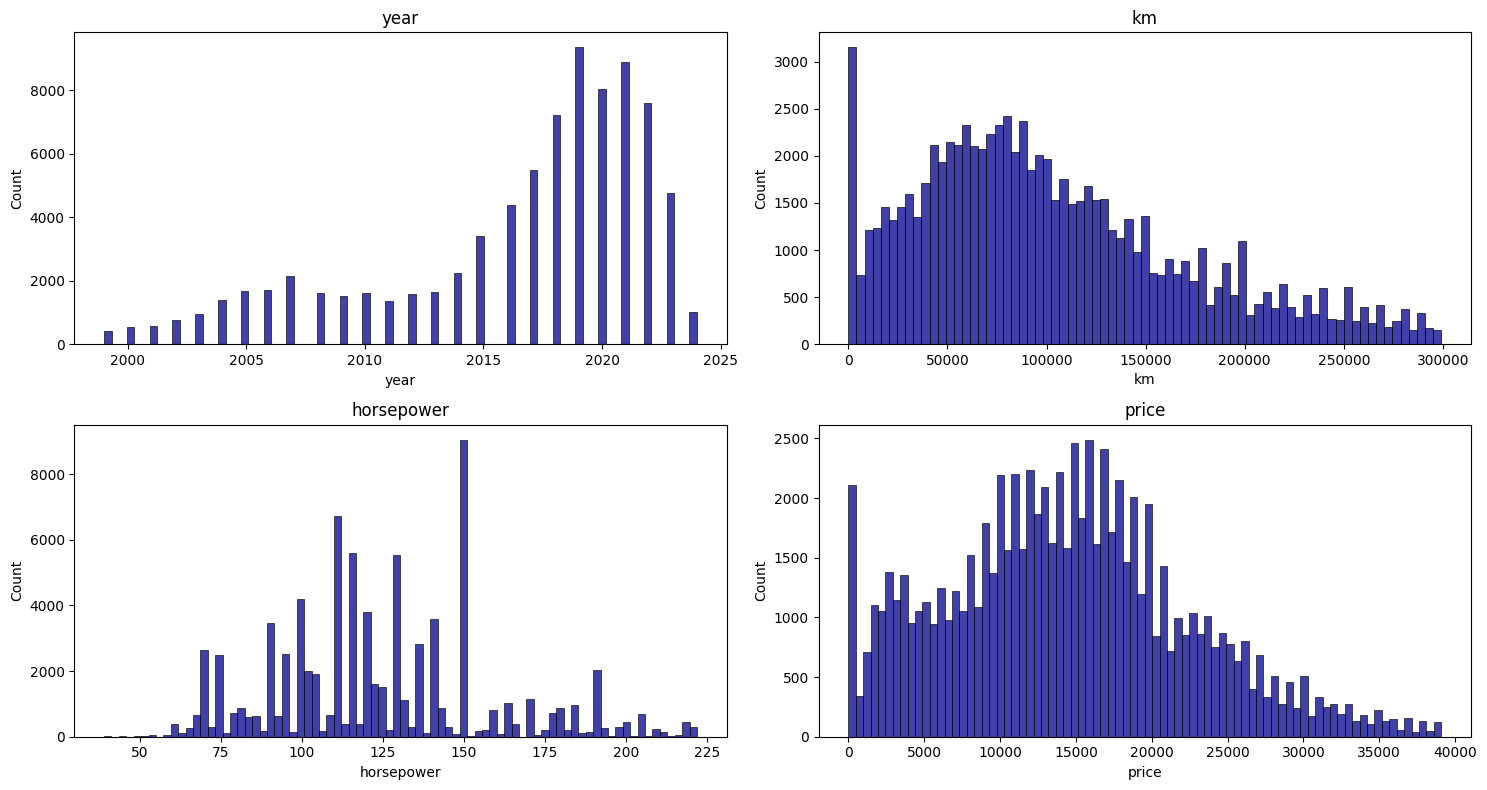

In [45]:

# Número de columnas para la cuadrícula
num_columns = 2
num_plots = len(df_sin_outliers.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_sin_outliers.columns):
    sns.histplot(df_sin_outliers[column], ax=axes[i], kde=False, color='darkblue')
    axes[i].set_title(column)


plt.tight_layout()
plt.show()

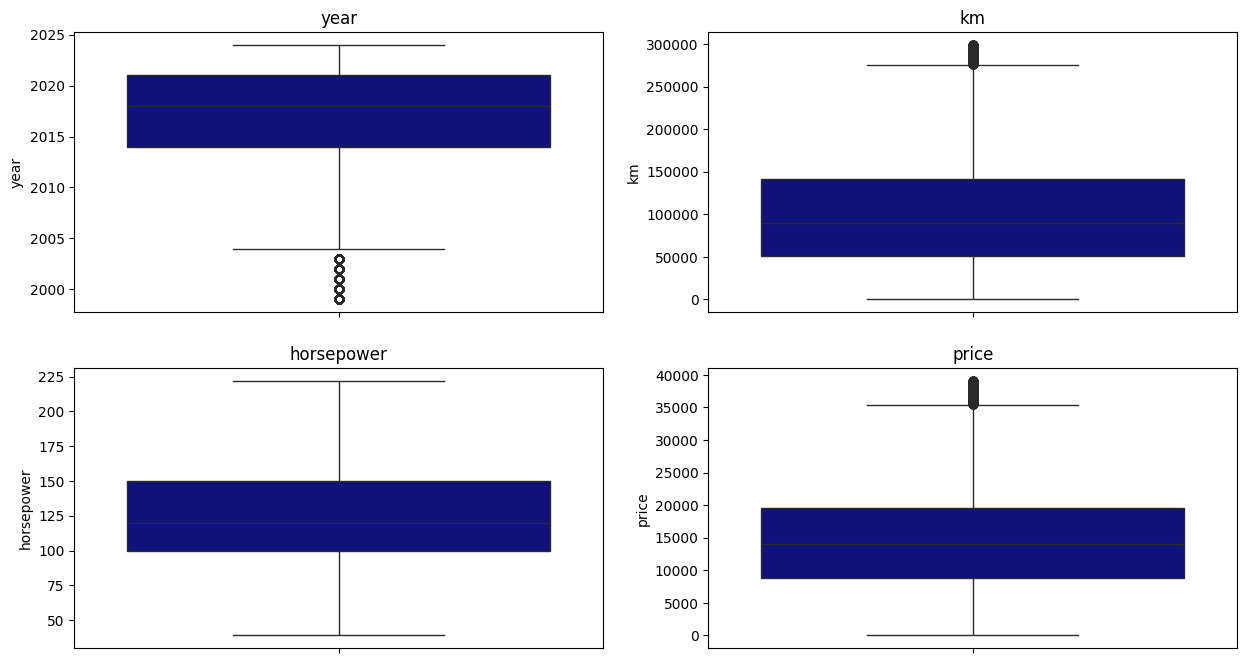

In [46]:
# Número de columnas para la cuadrícula
num_columns = 2
num_plots = len(df_sin_outliers.columns)
num_rows = (num_plots + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, column in enumerate(df_numericas.columns):
    sns.boxplot(df_sin_outliers[column], ax=axes[i], color='darkblue')
    axes[i].set_title(column)


sns.boxplot()
plt.show()


In [47]:
corr_matrix = df_sin_outliers.corr()
corr_matrix

,year,km,horsepower,price
year,1.000000,-0.641653,0.077235,0.645702
km,-0.641653,1.000000,0.028717,-0.466290
horsepower,0.077235,0.028717,1.000000,0.486665
price,0.645702,-0.466290,0.486665,1.000000


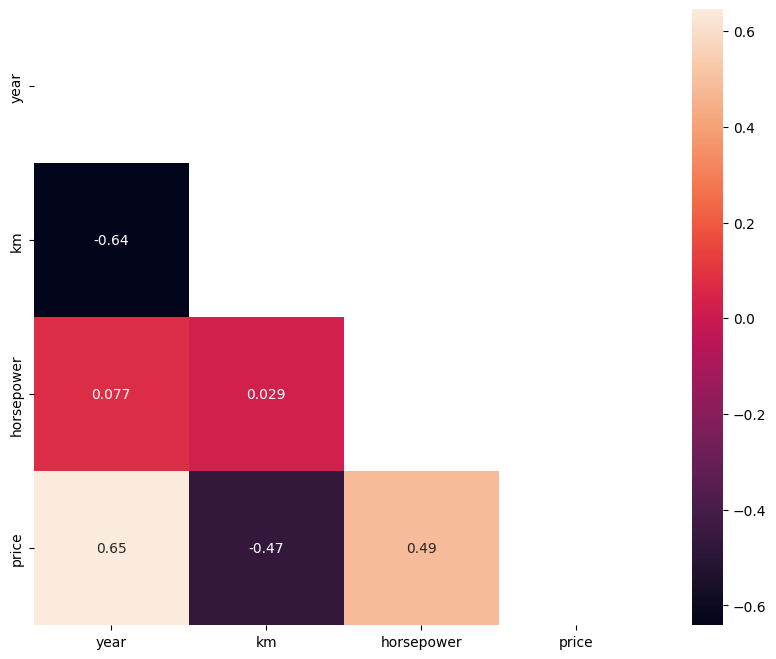

In [48]:
mask = np.zeros_like(df_sin_outliers.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_sin_outliers.corr(), mask=mask, annot=True)
plt.show()

### Valores categoricas:

In [49]:
df_categorical= df.select_dtypes(exclude = 'number')
df_categorical.head()

,content_id,title,storytelling,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,version,engine,gearbox,creation_date,modification_date,location.city,location.postal_code,location.country_code,location.province,brand
0,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,01,1.5 PHEV 192 kW (261 CV),Eléctrico,automatic,2024-08-01,2024-08-06,Granada,18014,ES,Granada,lynk & co
1,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),Gasolina,automatic,2024-08-02,2024-08-06,Granada,18014,ES,Granada,cupra
2,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Polo,R-Line 1.0 TSI 70 kW (95 CV),Gasolina,manual,2024-08-01,2024-08-06,Granada,18014,ES,Granada,volkswagen
3,4z4eqpmqxwjy,Mercedes-Benz Clase CLA CLA 250 e 160 kW (218 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Clase CLA,CLA 250 e 160 kW (218 CV),Eléctrico,automatic,2024-08-01,2024-08-06,Granada,18014,ES,Granada,mercedes-benz
4,36e1e2k4g8jd,Volkswagen Touran Advance 2.0 TDI 110 kW (150 ...,"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Touran,Advance 2.0 TDI 110 kW (150 CV) DSG,Diésel,automatic,2024-08-02,2024-08-06,Granada,18014,ES,Granada,volkswagen


In [50]:
df_categorical.columns

Index(['content_id', 'title', 'storytelling', 'user_id', 'flag_reserved',
       'flag_bumped', 'flag_country_bumped', 'currency', 'model', 'version',
       'engine', 'gearbox', 'creation_date', 'modification_date',
       'location.city', 'location.postal_code', 'location.country_code',
       'location.province', 'brand'],
      dtype='object')

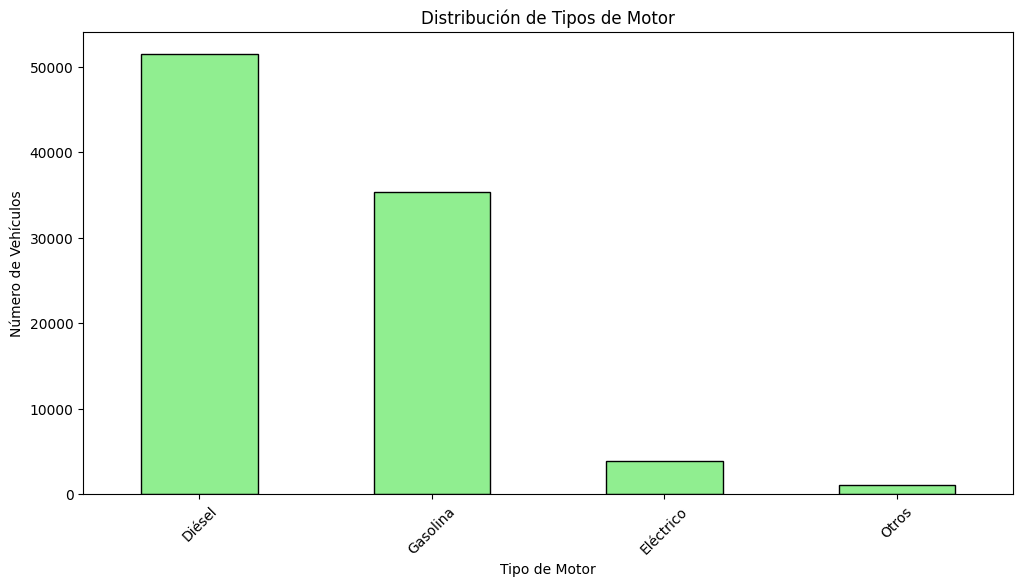

In [51]:
plt.figure(figsize=(12, 6))
df_categorical['engine'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de Tipos de Motor')
plt.xlabel('Tipo de Motor')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.show()



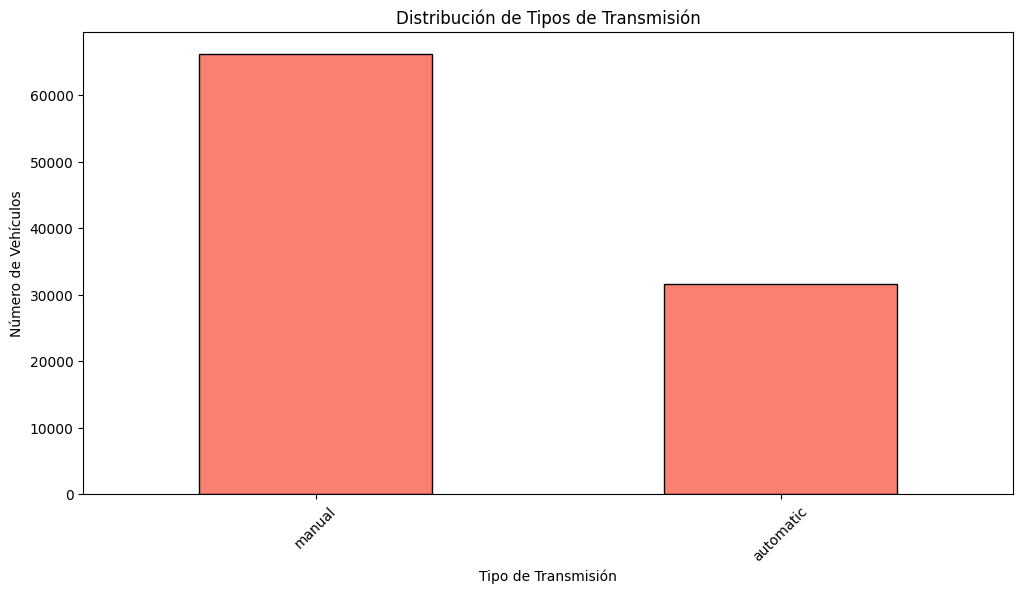

In [52]:
plt.figure(figsize=(12, 6))
df_categorical['gearbox'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribución de Tipos de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=45)
plt.show()


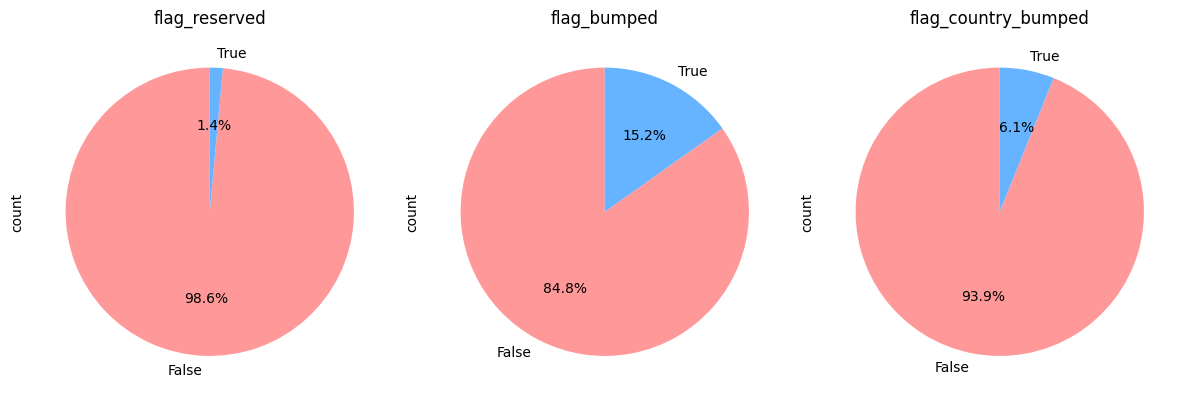

In [53]:
plt.figure(figsize=(12, 6))
flags = ['flag_reserved', 'flag_bumped', 'flag_country_bumped']
for flag in flags:
    plt.subplot(1, len(flags), flags.index(flag)+1)
    df[flag].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
    plt.title(flag)

plt.tight_layout()
plt.show()


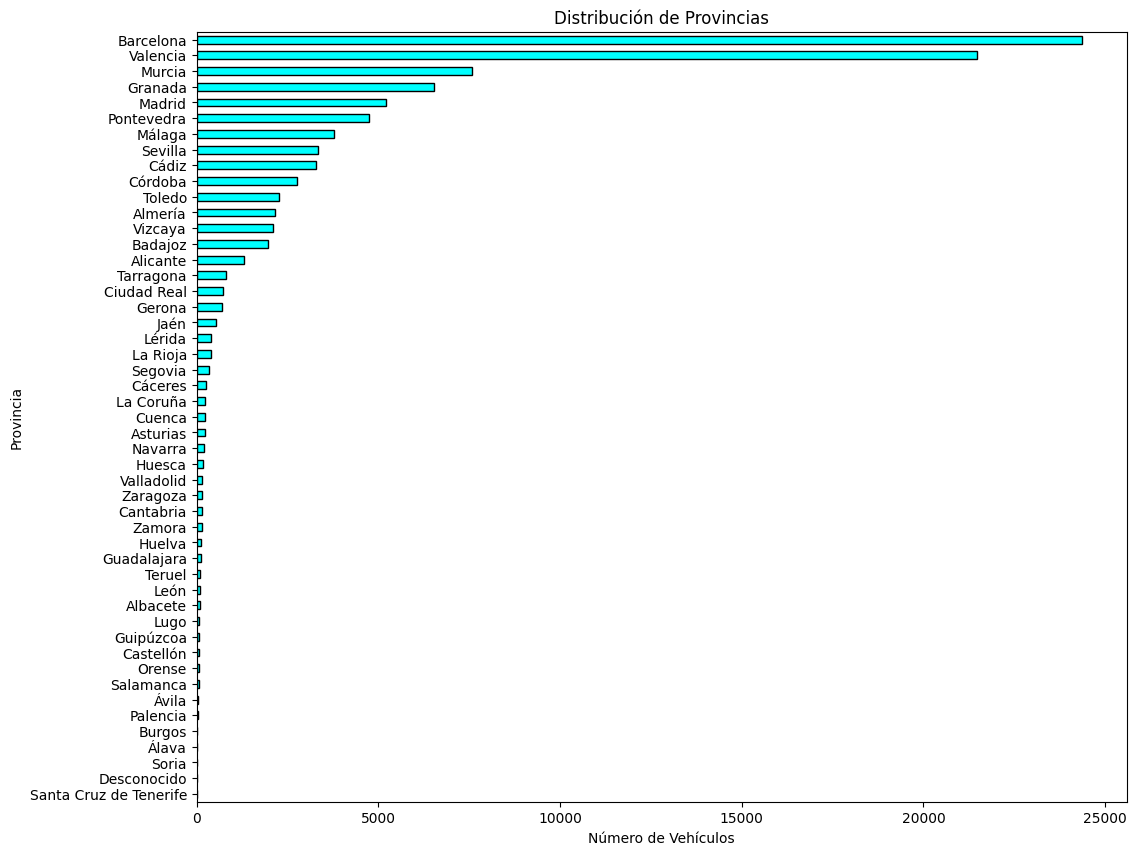

In [54]:
import matplotlib.pyplot as plt

# Contar las frecuencias y ordenar de mayor a menor
province_counts = df_categorical['location.province'].value_counts()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el gráfico de barras horizontal con los datos ordenados
province_counts.sort_values(ascending=True).plot(kind='barh', color='cyan', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Provincias')
plt.xlabel('Número de Vehículos')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()


In [55]:
# Concatenar df_categorical y df_sin_outliers
df_concatenado = pd.concat([df_categorical, df_numericas], axis=1)
df_concatenado.head(3)

,content_id,title,storytelling,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,version,...,modification_date,location.city,location.postal_code,location.country_code,location.province,brand,year,km,horsepower,price
0,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,01,1.5 PHEV 192 kW (261 CV),...,2024-08-06,Granada,18014,ES,Granada,lynk & co,2022.0,39973.0,261.0,25890.0
1,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),...,2024-08-06,Granada,18014,ES,Granada,cupra,2023.0,18900.0,150.0,24790.0
2,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Polo,R-Line 1.0 TSI 70 kW (95 CV),...,2024-08-06,Granada,18014,ES,Granada,volkswagen,2022.0,29994.0,95.0,18290.0


### Distribución de precios:

In [56]:
(df_sin_outliers['price'])

1         24790.0
2         18290.0
3         33890.0
4         24890.0
6         19890.0
           ...   
101444    13900.0
101445     4000.0
101446     3950.0
101449    33900.0
101450    25900.0
Name: price, Length: 82001, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

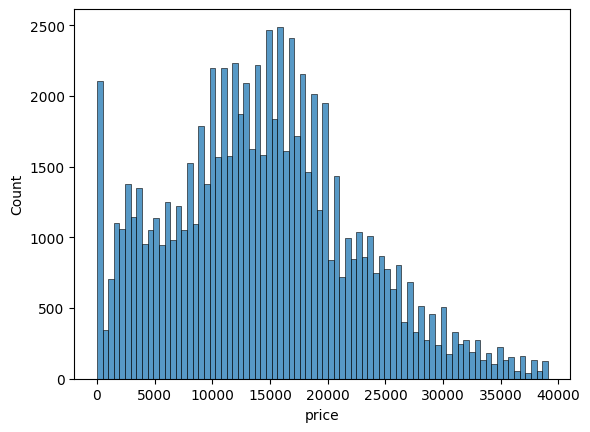

In [57]:
# comprobación de la distribución de precios
sns.histplot(df_sin_outliers['price'])

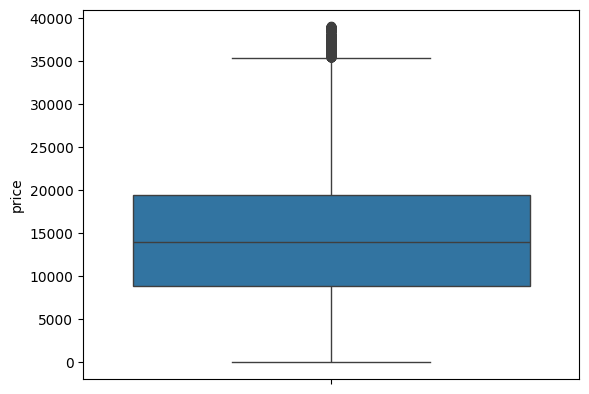

In [58]:
sns.boxplot(df_sin_outliers['price'])
plt.show()

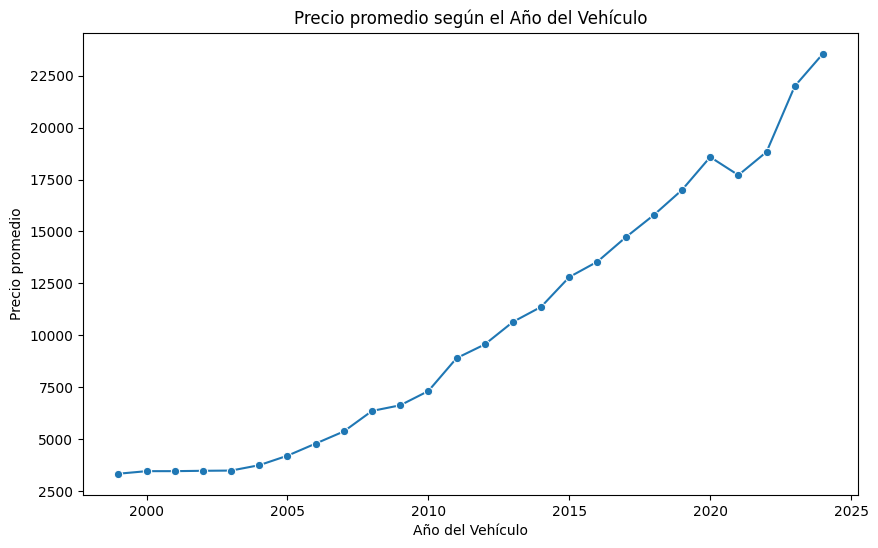

In [59]:
# Calcular el precio promedio por año
precio_por_ano = df_sin_outliers.groupby('year')['price'].mean()

# Visualizar la variación del precio según el año
plt.figure(figsize=(10, 6))
sns.lineplot(x=precio_por_ano.index, y=precio_por_ano.values, marker='o')
plt.title('Precio promedio según el Año del Vehículo')
plt.ylabel('Precio promedio')
plt.xlabel('Año del Vehículo')
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\174494389.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_por_km = df_sin_outliers.groupby(bins)['price'].mean()


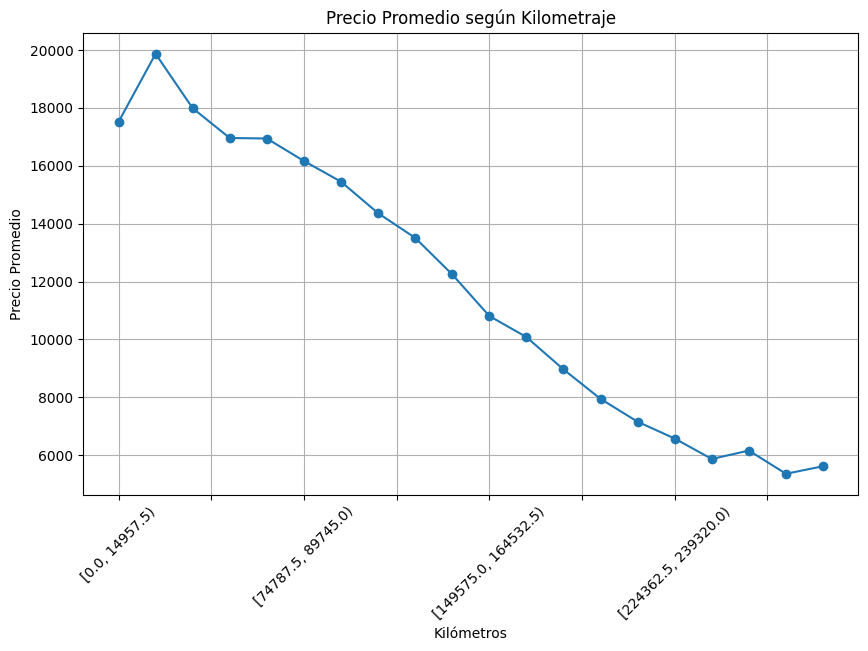

In [60]:
# Definir bins desde 0 hasta el valor máximo de kilometraje en el dataset
bins = pd.cut(df_sin_outliers['km'], bins=20, right=False)  # right=False asegura que los bins incluyen el límite inferior, pero no el superior

# Calcular el precio promedio por bin de kilometraje
precio_por_km = df_sin_outliers.groupby(bins)['price'].mean()

# Graficar la relación entre kilometraje y precio con una línea
plt.figure(figsize=(10, 6))
precio_por_km.plot(kind='line', marker='o')
plt.title('Precio Promedio según Kilometraje')
plt.ylabel('Precio Promedio')
plt.xlabel('Kilómetros')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor lectura
plt.grid(True)
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\154453932.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_por_CV = df_sin_outliers.groupby(bins)['horsepower'].mean()


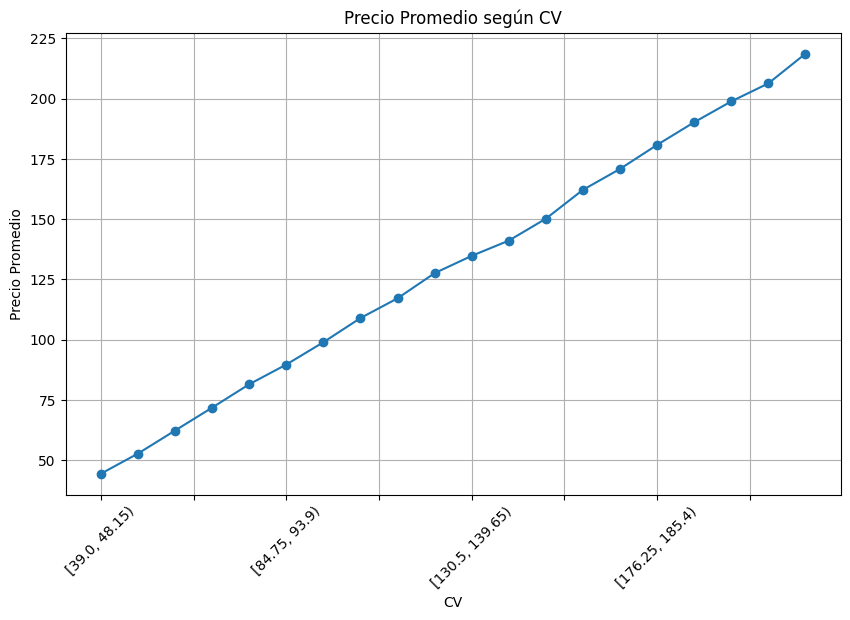

In [61]:
# Definir bins desde 0 hasta el valor máximo de CV en el dataset
bins = pd.cut(df_sin_outliers['horsepower'], bins=20, right=False)  # right=False asegura que los bins incluyen el límite inferior, pero no el superior

# Calcular el precio promedio por bin de CV
precio_por_CV = df_sin_outliers.groupby(bins)['horsepower'].mean()

# Graficar la relación entre CV y precio con una línea
plt.figure(figsize=(10, 6))
precio_por_CV.plot(kind='line', marker='o')
plt.title('Precio Promedio según CV')
plt.ylabel('Precio Promedio')
plt.xlabel('CV')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor lectura
plt.grid(True)
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\4289198553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_por_provincia.values, y=precio_por_provincia.index, palette='viridis')


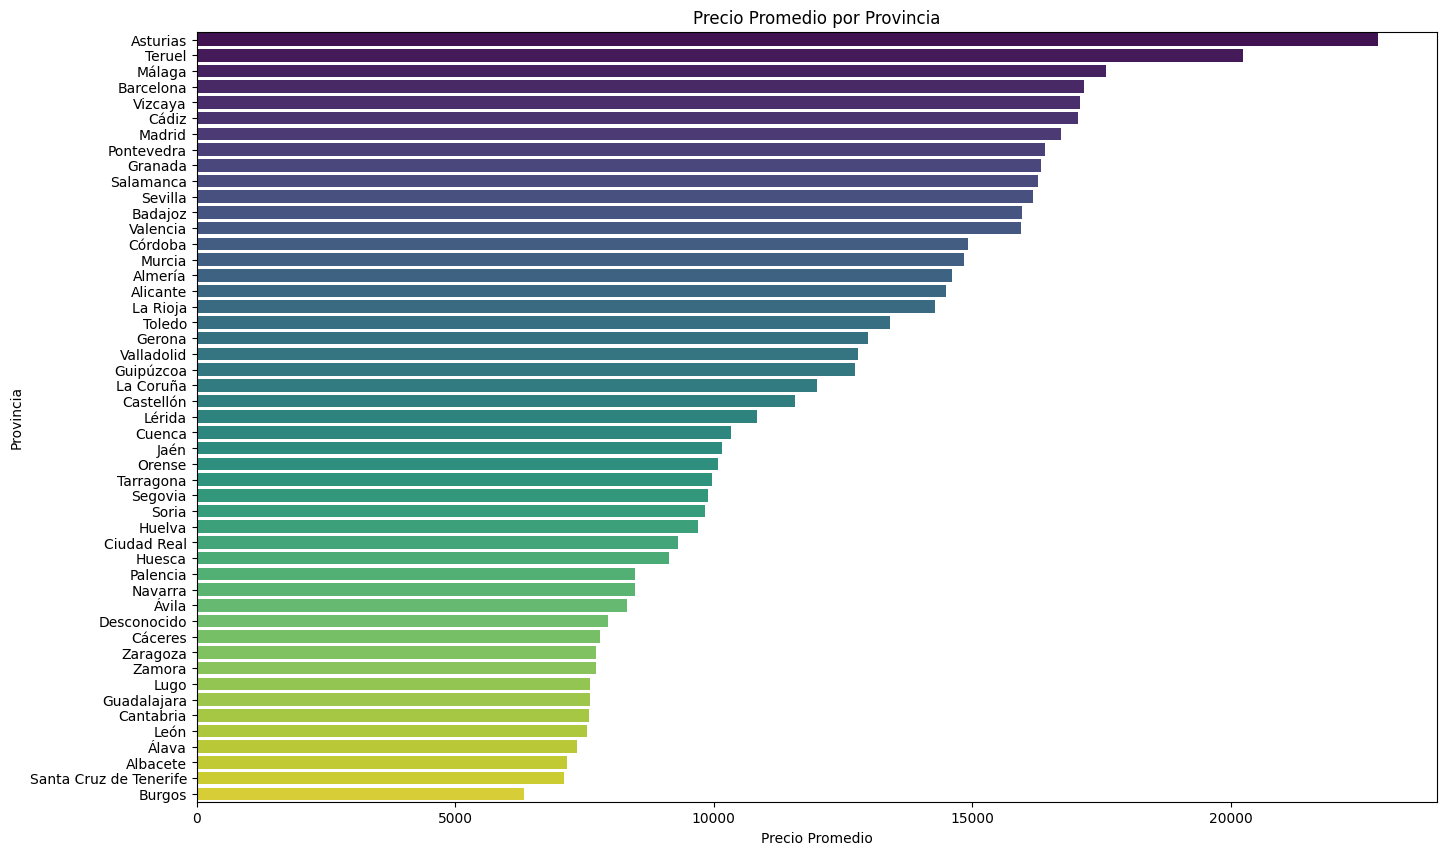

In [62]:
# Calcular el precio promedio por provincia
precio_por_provincia = df_concatenado.groupby('location.province')['price'].mean().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(16, 10))
sns.barplot(x=precio_por_provincia.values, y=precio_por_provincia.index, palette='viridis')
plt.title('Precio Promedio por Provincia')
plt.xlabel('Precio Promedio')
plt.ylabel('Provincia')
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_13248\3116318315.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ciudades.values, y=top_ciudades.index, palette='viridis')


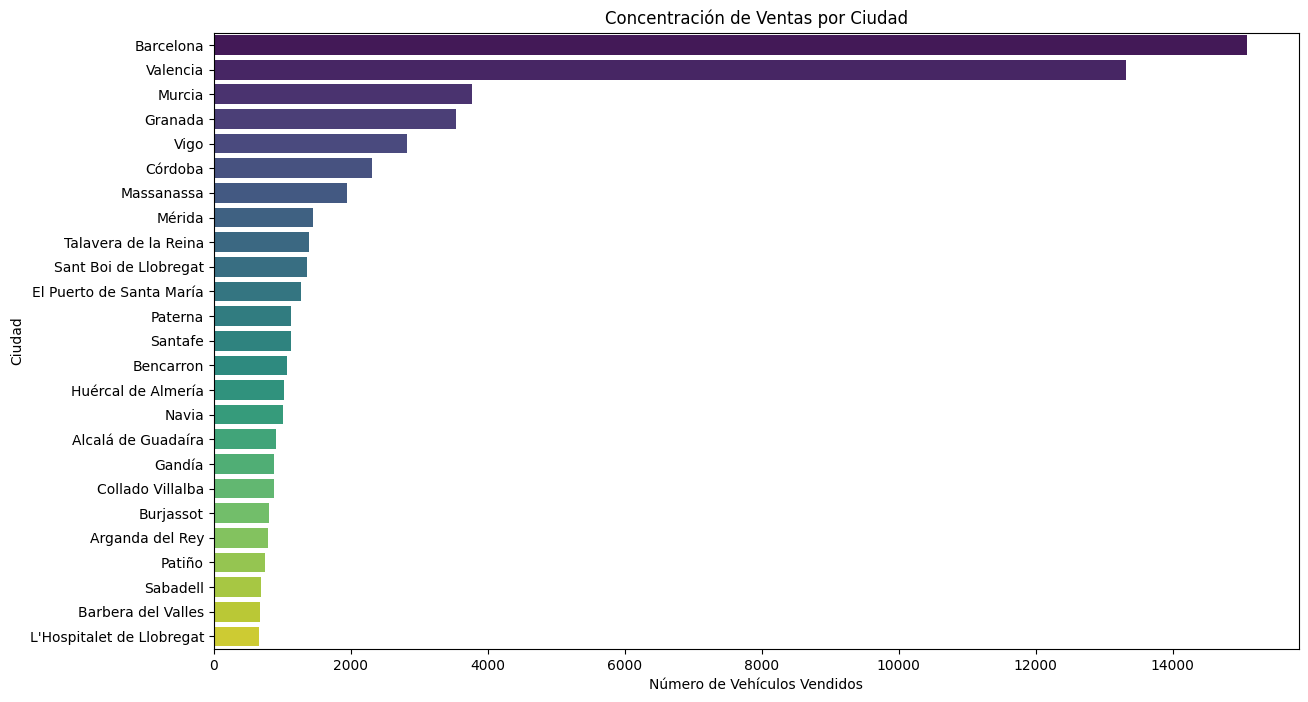

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de ventas por ciudad
ventas_por_ciudad = df_concatenado['location.city'].value_counts()

# Seleccionar las principales ciudades con más ventas
top_ciudades = ventas_por_ciudad.head(25)  # Cambia el número si quieres ver más ciudades

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=top_ciudades.values, y=top_ciudades.index, palette='viridis')
plt.title('Concentración de Ventas por Ciudad')
plt.xlabel('Número de Vehículos Vendidos')
plt.ylabel('Ciudad')
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_13248\1831509135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provincias.values, y=top_provincias.index, palette='magma')


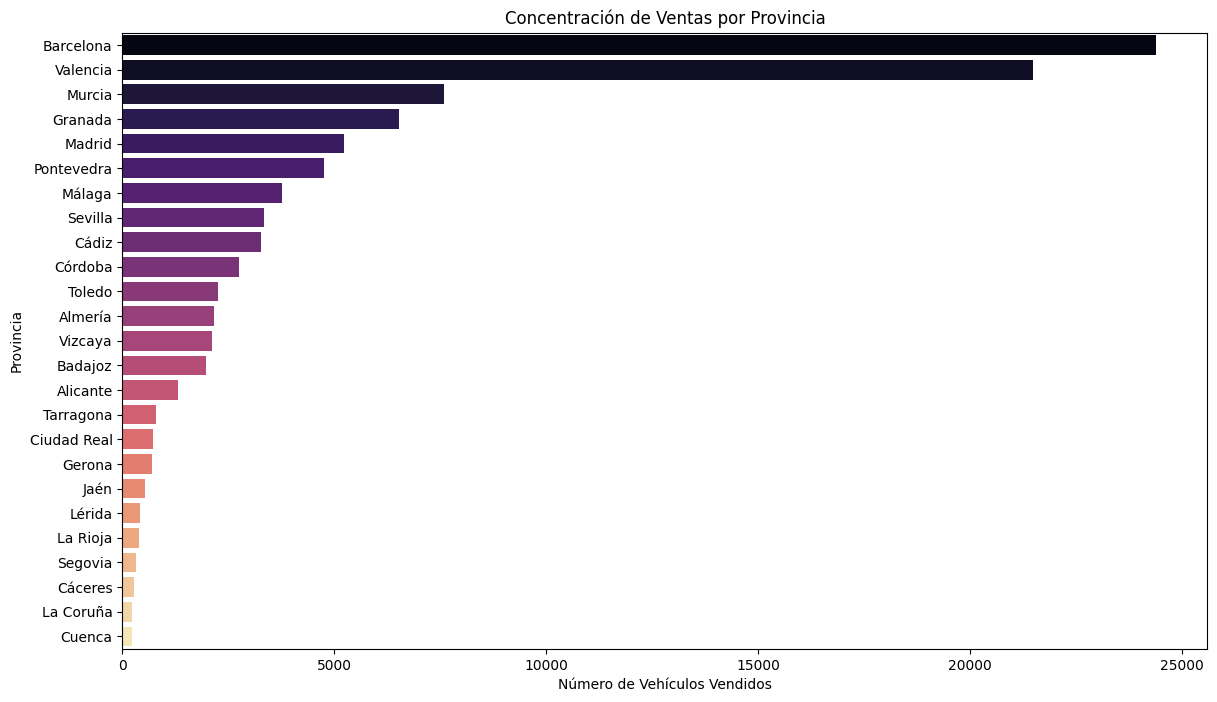

In [64]:
# Contar el número de ventas por provincia
ventas_por_provincia = df_concatenado['location.province'].value_counts()

# Seleccionar las principales provincias con más ventas
top_provincias = ventas_por_provincia.head(25)  # Cambia el número si quieres ver más provincias

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=top_provincias.values, y=top_provincias.index, palette='magma')
plt.title('Concentración de Ventas por Provincia')
plt.xlabel('Número de Vehículos Vendidos')
plt.ylabel('Provincia')
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_13248\1477091233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_marcas.values, y=top_25_marcas.index, palette='plasma')


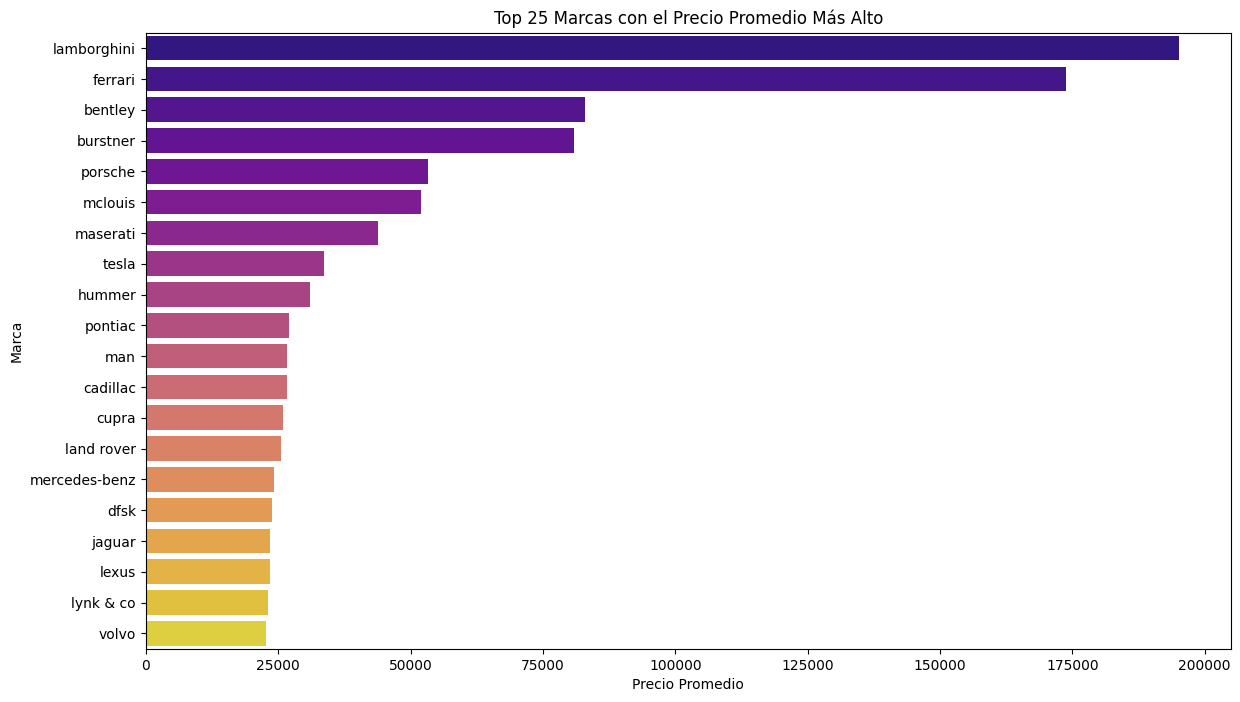

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el precio promedio por marca
precio_por_marca = df_concatenado.groupby('brand')['price'].mean().sort_values(ascending=False)

# Seleccionar las 25 marcas con el precio promedio más alto
top_25_marcas = precio_por_marca.head(20)

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=top_25_marcas.values, y=top_25_marcas.index, palette='plasma')
plt.title('Top 25 Marcas con el Precio Promedio Más Alto')
plt.xlabel('Precio Promedio')
plt.ylabel('Marca')
plt.show()



In [66]:
df_concatenado['brand'].nunique()

65

In [67]:
df_concatenado['brand'].unique()

array(['lynk & co', 'cupra', 'volkswagen', 'mercedes-benz', 'mg', 'bmw',
       'hyundai', 'audi', 'peugeot', 'land rover', 'mini', 'renault',
       'fiat', 'seat', 'citroen', 'opel', 'alfa romeo', 'ford', 'kia',
       'nissan', 'dacia', 'porsche', 'skoda', 'toyota', 'ssangyong',
       'subaru', 'bentley', 'jaguar', 'mitsubishi', 'jeep', 'mazda',
       'man', 'volvo', 'infiniti', 'tesla', 'ds', 'smart', 'ligier',
       'lexus', 'chevrolet', 'abarth', 'daewoo', 'dfsk', 'saab', 'suzuki',
       'honda', 'aixam', 'microcar', 'maserati', 'burstner', 'evo', 'dr',
       'mclouis', 'lancia', 'chrysler', 'dodge', 'cadillac', 'hummer',
       'ferrari', 'lamborghini', 'tata', 'swm', 'chatenet', 'pontiac',
       'mahindra'], dtype=object)

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\2222340745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_marcas_baratos.values, y=top_25_marcas_baratos.index, palette='viridis')


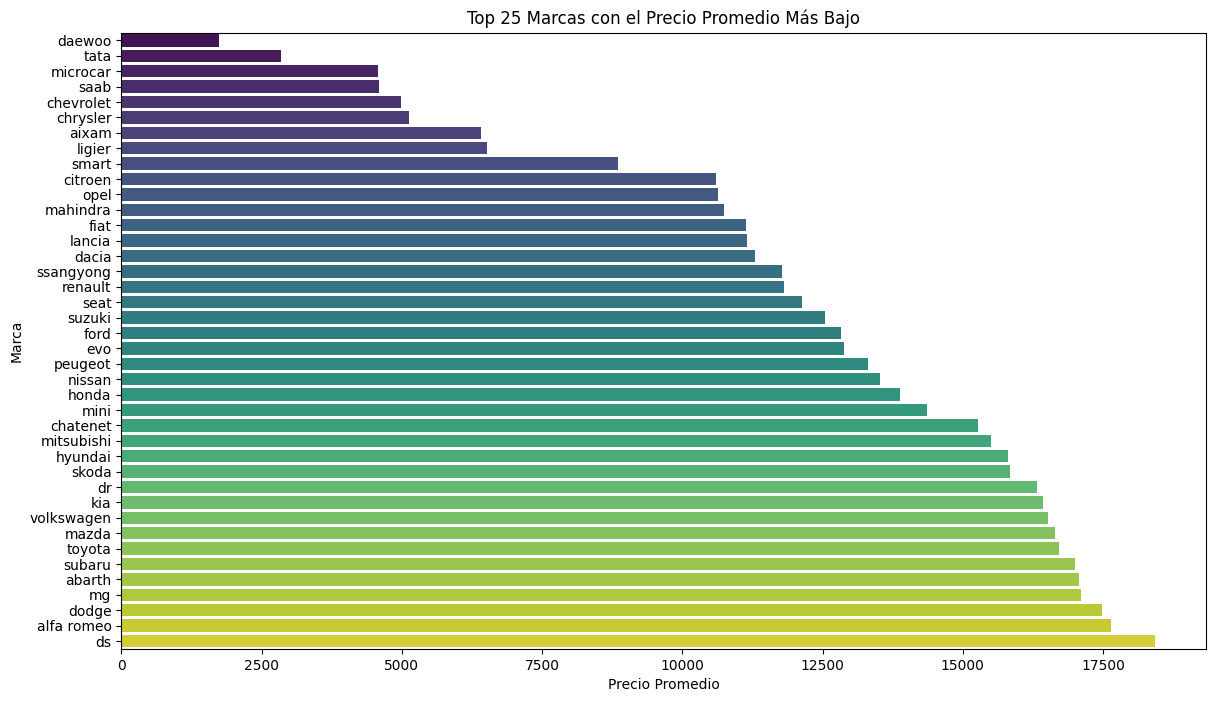

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el precio promedio por marca
precio_por_marca = df_concatenado.groupby('brand')['price'].mean().sort_values(ascending=True)  # Ordenar en orden ascendente

# Seleccionar las 25 marcas con el precio promedio más bajo
top_25_marcas_baratos = precio_por_marca.head(40)

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=top_25_marcas_baratos.values, y=top_25_marcas_baratos.index, palette='viridis')
plt.title('Top 25 Marcas con el Precio Promedio Más Bajo')
plt.xlabel('Precio Promedio')
plt.ylabel('Marca')
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_13248\3596123831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_marcas_vendidas.values, y=top_25_marcas_vendidas.index, palette='viridis')


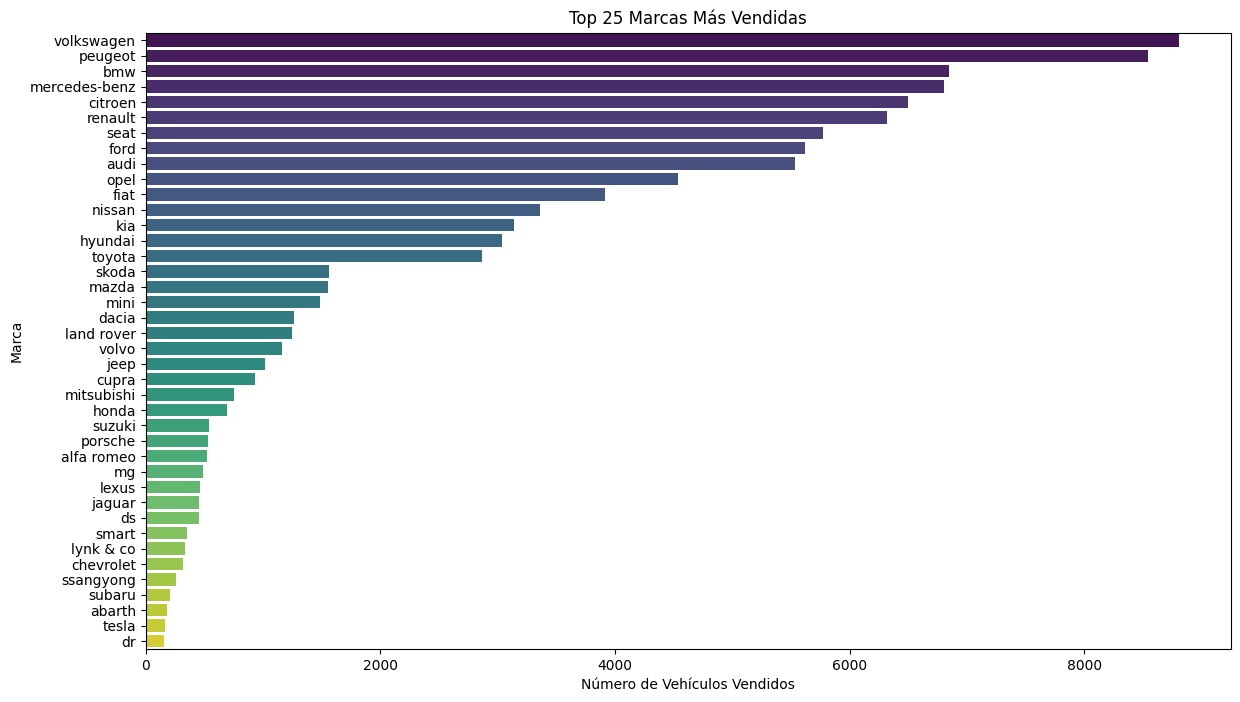

In [69]:
# Contar el número de ocurrencias de cada marca
marcas_mas_vendidas = df['brand'].value_counts()

# Seleccionar las 25 marcas más vendidas
top_25_marcas_vendidas = marcas_mas_vendidas.head(40)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=top_25_marcas_vendidas.values, y=top_25_marcas_vendidas.index, palette='viridis')
plt.title('Top 25 Marcas Más Vendidas')
plt.xlabel('Número de Vehículos Vendidos')
plt.ylabel('Marca')
plt.show()

### Machine learning

In [70]:
df_concatenado.head(3)

,content_id,title,storytelling,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,version,...,modification_date,location.city,location.postal_code,location.country_code,location.province,brand,year,km,horsepower,price
0,4z4eqpmqwvjy,Lynk & Co 01 1.5 PHEV 192 kW (261 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,01,1.5 PHEV 192 kW (261 CV),...,2024-08-06,Granada,18014,ES,Granada,lynk & co,2022.0,39973.0,261.0,25890.0
1,qjw4qk8wpgzo,CUPRA Leon 1.5 eTSI DSG 110 kW (150 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Leon,1.5 eTSI DSG 110 kW (150 CV),...,2024-08-06,Granada,18014,ES,Granada,cupra,2023.0,18900.0,150.0,24790.0
2,36e1el0ekqjd,Volkswagen Polo R-Line 1.0 TSI 70 kW (95 CV),"¡¡Condiciones a consultar!! Hola, ¿Cómo estás?...",xzo87r5ny769,False,True,False,EUR,Polo,R-Line 1.0 TSI 70 kW (95 CV),...,2024-08-06,Granada,18014,ES,Granada,volkswagen,2022.0,29994.0,95.0,18290.0


In [71]:
df_concatenado.shape

(99650, 23)

#### CATEGORIZACION

In [72]:
# Definir las listas de marcas para cada gama
gama_alta = ['bentley', 'porsche', 'mclouis', 'maserati', 'tesla', 
             'hummer', 'pontiac', 'man', 'cadillac']

gama_media_alta = ['cupra', 'land rover', 'mercedes-benz', 'dfsk', 'jaguar', 
                   'lexus', 'lynk & co', 'volvo', 'swm', 'audi', 'jeep', 
                   'bmw', 'infiniti', 'ds', 'alfa romeo', 'dodge', 'mg', 
                   'abarth', 'subaru', 'toyota', 'mazda', 'volkswagen']

gama_media = ['kia', 'dr', 'skoda', 'hyundai', 'mitsubishi', 'chatenet', 
              'mini', 'honda', 'nissan', 'peugeot', 'evo', 'ford', 'suzuki', 
              'seat', 'renault', 'ssangyong', 'dacia', 'lancia', 'fiat', 
              'mahindra', 'opel', 'citroen']

gama_baja = ['smart', 'ligier', 'aixam', 'chrysler', 'chevrolet', 'saab', 
             'microcar', 'tata', 'daewoo']


In [73]:
def categorizar_gama(marca):
    if marca in gama_alta:
        return 'Gama alta'
    elif marca in gama_media_alta:
        return 'Gama media-alta'
    elif marca in gama_media:
        return 'Gama media'
    elif marca in gama_baja:
        return 'Gama baja'
    else:
        return 'Otra'

In [74]:
df_categorical['gama'] = df_categorical['brand'].apply(categorizar_gama)

Voy a eliminar y codificar las columnas que necesito. 
Para ello realizare la codificación de diferentes maneras, como son LabelEncoder, convertir las columnas booleanas a 0 y 1, 

In [75]:
# Eliminar las columnas especificadas
df_categorical_machine = df_categorical.drop(['content_id', 'title', 'storytelling', 'version'], axis=1)

# Mostrar el resultado
df_categorical_machine.head(2)


,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,creation_date,modification_date,location.city,location.postal_code,location.country_code,location.province,brand,gama
0,xzo87r5ny769,False,True,False,EUR,01,Eléctrico,automatic,2024-08-01,2024-08-06,Granada,18014,ES,Granada,lynk & co,Gama media-alta
1,xzo87r5ny769,False,True,False,EUR,Leon,Gasolina,automatic,2024-08-02,2024-08-06,Granada,18014,ES,Granada,cupra,Gama media-alta


In [76]:
from sklearn.preprocessing import LabelEncoder

# Crear el objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'brand'
df_categorical_machine['brand'] = le.fit_transform(df_categorical_machine['brand'])

# Ver los valores únicos después de la codificación
print(df_categorical_machine['brand'].unique())


[35 12 63 41 42  5 25  3 48 32 44 51 21 53 11 47  2 22 29 46 13 50 54 62
 56 57  4 27 45 28 39 37 64 26 61 18 55 34 33  9  0 14 15 52 58 23  1 43
 38  6 19 17 40 31 10 16  7 24 20 30 60 59  8 49 36]


In [77]:
# Aplicar Label Encoding a múltiples columnas categóricas
columns_to_encode = ['user_id','model', 'location.city', 'location.province', 'currency', 'gearbox', 'engine','gama']

for column in columns_to_encode:
    df_categorical_machine[column] = le.fit_transform(df_categorical_machine[column])


In [78]:
# Convertir 'location.postal_code' a números
df_categorical_machine['location.postal_code'] = pd.to_numeric(df_categorical_machine['location.postal_code'], errors='coerce')

# Convertir 'location.country_code' a números (utilizando el codificador de etiquetas)
le = LabelEncoder()
df_categorical_machine['location.country_code'] = le.fit_transform(df_categorical_machine['location.country_code'])

# Verificar los resultados
print(df_categorical_machine[['location.postal_code', 'location.country_code']].head())


   location.postal_code  location.country_code
0               18014.0                      0
1               18014.0                      0
2               18014.0                      0
3               18014.0                      0
4               18014.0                      0


In [79]:
# Convertir las columnas booleanas a 0 y 1
boolean_columns = ['flag_reserved', 'flag_bumped', 'flag_country_bumped']

df_categorical_machine[boolean_columns] = df_categorical_machine[boolean_columns].astype(int)


In [80]:
# Convertir a datetime
df_categorical_machine['creation_date'] = pd.to_datetime(df_categorical_machine['creation_date'])
df_categorical_machine['modification_date'] = pd.to_datetime(df_categorical_machine['modification_date'])

# Extraer año, mes y día
df_categorical_machine['creation_year'] = df_categorical_machine['creation_date'].dt.year
df_categorical_machine['creation_month'] = df_categorical_machine['creation_date'].dt.month
df_categorical_machine['creation_day'] = df_categorical_machine['creation_date'].dt.day

df_categorical_machine['modification_year'] = df_categorical_machine['modification_date'].dt.year
df_categorical_machine['modification_month'] = df_categorical_machine['modification_date'].dt.month
df_categorical_machine['modification_day'] = df_categorical_machine['modification_date'].dt.day

df_categorical_machine = df_categorical_machine.drop(columns=['creation_date', 'modification_date'])


In [81]:
df_categorical_machine

,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,location.city,location.postal_code,location.country_code,location.province,brand,gama,creation_year,creation_month,creation_day,modification_year,modification_month,modification_day
0,22028,0,1,0,0,15,1,0,844,18014.0,0,16,35,3,2024,8,1,2024,8,6
1,22028,0,1,0,0,1392,2,0,844,18014.0,0,16,12,3,2024,8,2,2024,8,6
2,22028,0,1,0,0,1704,2,1,844,18014.0,0,16,63,3,2024,8,1,2024,8,6
3,22028,0,1,0,0,735,1,0,844,18014.0,0,16,41,3,2024,8,1,2024,8,6
4,22028,0,1,0,0,2117,0,0,844,18014.0,0,16,63,3,2024,8,2,2024,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101447,12508,0,0,0,0,1310,0,1,1777,15189.0,0,22,51,2,2024,8,7,2024,8,7
101448,18797,0,0,0,0,1913,0,1,1372,15680.0,0,22,25,2,2024,8,7,2024,8,7
101449,523,0,0,0,0,1735,0,0,1084,15689.0,0,22,3,3,2024,8,7,2024,8,7
101450,523,0,0,0,0,2096,0,0,1084,15689.0,0,22,63,3,2024,8,7,2024,8,7


In [82]:
df_machine_learning = pd.concat([df_categorical_machine, df_sin_outliers], axis=1)
df_machine_learning

,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,location.city,location.postal_code,...,creation_year,creation_month,creation_day,modification_year,modification_month,modification_day,year,km,horsepower,price
0,22028,0,1,0,0,15,1,0,844,18014.0,...,2024,8,1,2024,8,6,NaN,NaN,NaN,NaN
1,22028,0,1,0,0,1392,2,0,844,18014.0,...,2024,8,2,2024,8,6,2023.0,18900.0,150.0,24790.0
2,22028,0,1,0,0,1704,2,1,844,18014.0,...,2024,8,1,2024,8,6,2022.0,29994.0,95.0,18290.0
3,22028,0,1,0,0,735,1,0,844,18014.0,...,2024,8,1,2024,8,6,2021.0,93279.0,218.0,33890.0
4,22028,0,1,0,0,2117,0,0,844,18014.0,...,2024,8,2,2024,8,6,2021.0,79934.0,150.0,24890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101447,12508,0,0,0,0,1310,0,1,1777,15189.0,...,2024,8,7,2024,8,7,NaN,NaN,NaN,NaN
101448,18797,0,0,0,0,1913,0,1,1372,15680.0,...,2024,8,7,2024,8,7,NaN,NaN,NaN,NaN
101449,523,0,0,0,0,1735,0,0,1084,15689.0,...,2024,8,7,2024,8,7,2019.0,129000.0,190.0,33900.0
101450,523,0,0,0,0,2096,0,0,1084,15689.0,...,2024,8,7,2024,8,7,2020.0,140000.0,150.0,25900.0


In [83]:
df_gama_alta = df_machine_learning[df_machine_learning['gama'] == 0]
print("Gama Alta:")
df_gama_alta.head(2)

Gama Alta:


,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,location.city,location.postal_code,...,creation_year,creation_month,creation_day,modification_year,modification_month,modification_day,year,km,horsepower,price
164,22028,0,1,0,0,2084,1,0,844,18014.0,...,2024,8,2,2024,8,6,NaN,NaN,NaN,NaN
192,22300,0,1,1,0,800,2,0,603,18195.0,...,2024,6,17,2024,8,6,NaN,NaN,NaN,NaN


In [84]:
df_gama_baja = df_machine_learning[df_machine_learning['gama'] == 1]
print("\nGama Baja:")
df_gama_baja.head(2)


Gama Baja:


,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,location.city,location.postal_code,...,creation_year,creation_month,creation_day,modification_year,modification_month,modification_day,year,km,horsepower,price
381,6925,0,0,0,0,2432,0,1,177,18100.0,...,2024,8,6,2024,8,6,2007.0,202000.0,41.0,2700.0
452,3618,0,1,0,0,2493,0,0,1048,18140.0,...,2024,7,22,2024,8,6,2023.0,6600.0,49.0,16200.0


In [106]:
df_gama_media = df_machine_learning[df_machine_learning['gama'] == 2]
print("\nGama Media:")
df_gama_media.head(200)


Gama Media:


,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,location.city,location.postal_code,...,creation_year,creation_month,creation_day,modification_year,modification_month,modification_day,year,km,horsepower,price
8,22028,0,1,0,0,2154,2,1,844,18014.0,...,2024,8,1,2024,8,6,2024.0,-1.122127,0.606557,1.922554
10,22028,0,1,0,0,239,0,0,844,18014.0,...,2024,8,2,2024,8,6,2023.0,-1.207392,0.497268,1.922554
22,22028,0,1,0,0,1456,2,0,844,18014.0,...,2024,8,2,2024,8,6,2020.0,-0.774442,0.344262,0.306641
36,22028,0,1,0,0,673,2,1,844,18014.0,...,2024,8,2,2024,8,6,2019.0,-0.385436,0.278689,-0.314864
41,22028,0,1,0,0,240,2,1,844,18014.0,...,2024,8,2,2024,8,6,2021.0,-0.537802,0.169399,-0.339724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,21241,0,0,0,0,1018,0,1,1437,18210.0,...,2024,6,20,2024,8,5,2014.0,0.793193,0.196721,-0.972541
495,4161,0,0,0,0,540,0,1,844,18002.0,...,2024,8,5,2024,8,6,2004.0,1.856450,0.530055,-1.506911
496,21942,0,0,0,0,820,2,1,844,18005.0,...,2024,8,5,2024,8,5,2018.0,-0.299195,0.333333,-0.462782
500,22195,0,1,1,0,673,2,1,844,18002.0,...,2024,7,20,2024,8,6,2022.0,-0.804111,0.278689,0.194770


In [105]:
df_gama_media_alta = df_machine_learning[df_machine_learning['gama'] == 3]
print("\nGama Media Alta:")
df_gama_media_alta.head(200)


Gama Media Alta:


,user_id,flag_reserved,flag_bumped,flag_country_bumped,currency,model,engine,gearbox,location.city,location.postal_code,...,creation_year,creation_month,creation_day,modification_year,modification_month,modification_day,year,km,horsepower,price
1,22028,0,1,0,0,1392,2,0,844,18014.0,...,2024,8,2,2024,8,6,2023.0,-1.218258,0.606557,1.288619
2,22028,0,1,0,0,1704,2,1,844,18014.0,...,2024,8,1,2024,8,6,2022.0,-1.056671,0.306011,0.480662
3,22028,0,1,0,0,735,1,0,844,18014.0,...,2024,8,1,2024,8,6,2021.0,-0.134915,0.978142,2.419758
4,22028,0,1,0,0,2117,0,0,844,18014.0,...,2024,8,2,2024,8,6,2021.0,-0.329287,0.606557,1.301049
6,22028,0,1,0,0,1199,2,1,844,18014.0,...,2024,8,1,2024,8,6,2023.0,-1.285986,0.672131,0.679544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,8239,0,0,0,0,884,0,1,1437,18210.0,...,2024,3,13,2024,8,5,2016.0,0.531020,0.606557,0.568916
517,8239,0,0,0,0,1954,0,1,1437,18210.0,...,2024,3,19,2024,8,5,2017.0,1.412212,0.606557,-0.077449
518,8239,0,0,0,0,1740,0,0,1437,18210.0,...,2024,2,23,2024,8,5,2016.0,0.370803,0.715847,1.314722
520,8239,0,0,0,0,1073,0,0,1437,18210.0,...,2024,5,29,2024,8,5,2017.0,1.521451,0.715847,2.184830


#### Normalizacion

In [103]:
df_machine_learning = df_machine_learning.dropna()
df_gama_alta = df_machine_learning.dropna()
df_gama_baja = df_machine_learning.dropna()
df_gama_media = df_machine_learning.dropna()
df_gama_media_alta = df_machine_learning.dropna()


In [88]:
# Normalizacion y escalada

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columnas para normalización
columns_to_normalize = ['km', 'price']

# Columnas para escalado
columns_to_scale = ['horsepower']


In [89]:
# Inicializar los scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplicar el StandardScaler a las columnas seleccionadas
df_machine_learning[columns_to_normalize] = scaler_standard.fit_transform(df_machine_learning[columns_to_normalize])
df_gama_alta[columns_to_normalize] = scaler_standard.fit_transform(df_gama_alta[columns_to_normalize])   
df_gama_baja[columns_to_normalize] = scaler_standard.fit_transform(df_gama_baja[columns_to_normalize])  
df_gama_media[columns_to_normalize] = scaler_standard.fit_transform(df_gama_media[columns_to_normalize])  
df_gama_media_alta[columns_to_normalize] = scaler_standard.fit_transform(df_gama_media_alta[columns_to_normalize])  
# Aplicar el MinMaxScaler a las columnas seleccionadas
df_machine_learning[columns_to_scale] = scaler_minmax.fit_transform(df_machine_learning[columns_to_scale])
df_gama_alta[columns_to_scale] = scaler_minmax.fit_transform(df_gama_alta[columns_to_scale])
df_gama_baja[columns_to_scale] = scaler_minmax.fit_transform(df_gama_baja[columns_to_scale])
df_gama_media[columns_to_scale] = scaler_minmax.fit_transform(df_gama_media[columns_to_scale])
df_gama_media_alta[columns_to_scale] = scaler_minmax.fit_transform(df_gama_media_alta[columns_to_scale])

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\65474023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_machine_learning[columns_to_normalize] = scaler_standard.fit_transform(df_machine_learning[columns_to_normalize])
C:\Users\marco\AppData\Local\Temp\ipykernel_13248\65474023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gama_baja[columns_to_normalize] = scaler_standard.fit_transform(df_gama_baja[columns_to_normalize])
C:\Users\marco\AppData\Local\Temp\ipykernel_13248\65474023.py:12: Sett

In [90]:
# Verificar los primeros registros para asegurarse de que la transformación fue exitosa
df_machine_learning[columns_to_normalize + columns_to_scale].head()


,km,price,horsepower
1,-1.218258,1.288619,0.606557
2,-1.056671,0.480662,0.306011
3,-0.134915,2.419758,0.978142
4,-0.329287,1.301049,0.606557
6,-1.285986,0.679544,0.672131


In [104]:
# Uso el DataFreme df_modelo1.
from sklearn.model_selection import train_test_split
X = df_gama_baja.drop(['price'], axis=1)
y = df_gama_baja['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train


# y_pred es la lista de predicciones
# y_test es la lista de valores reales

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.69
RMSE: 0.5605331550508541
MAE: 0.37763795611982215


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='price'>

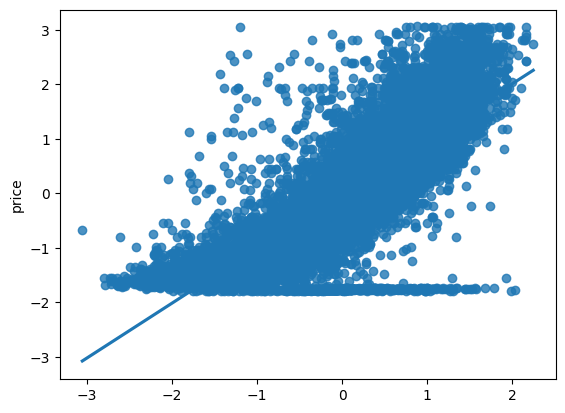

In [107]:
sns.regplot(x=predictions, y=y_test)

In [93]:
import numpy as np
df_machine_learning_logaritmica = df_machine_learning.copy()
df_machine_learning_logaritmica['price'] = df_machine_learning_logaritmica['price'].apply(np.log)

C:\Users\marco\AppData\Local\Temp\ipykernel_13248\818543502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_machine_learning['price'])


<Axes: xlabel='price', ylabel='Density'>

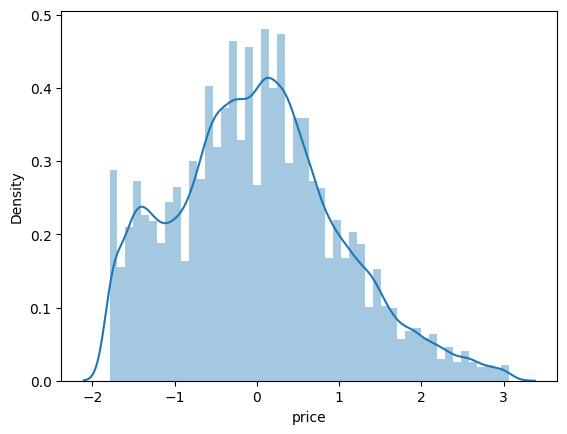

In [94]:
sns.distplot(df_machine_learning['price'])

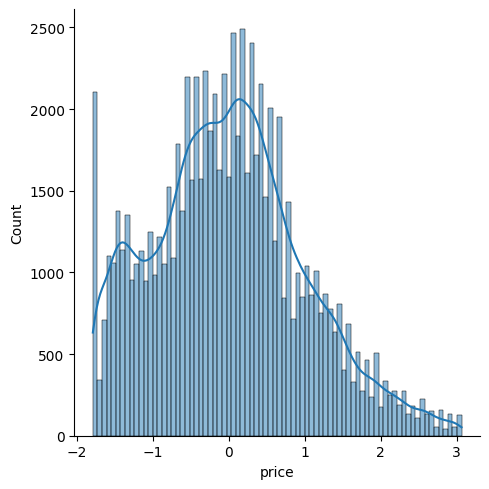

In [95]:
# Utilizando sns.displot para crear una distribución de precios
sns.displot(df_machine_learning['price'], kde=True)

# Mostrar la gráfica
plt.show()


In [96]:
# Aplicar transformación logarítmica a la variable dependiente

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

# Suponiendo que df_concatenado es tu DataFrame y está ya cargado
# Variables independientes y dependientes
X = df_machine_learning_logaritmica.drop('price', axis=1)
y = df_machine_learning_logaritmica['price']

# Aplicar transformación logarítmica a la variable dependiente
y_log = np.log(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train_log)


# Realizar predicciones
y_pred_log = modelo.predict(X_test)

# Aplicar la transformación inversa a las predicciones
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)

# Evaluar el modelo

# Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")

# Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")

# Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Raíz del Error Cuadrático Medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input y contains NaN.

In [ ]:
print(y_train_log.isnull().sum())

22


In [ ]:
# 2. Selección de las características y variable objetivo
X = df_machine_learning[['gama', 'brand', 'model', 'km', 'horsepower']]  # Añade otras características que creas necesarias
y = df_machine_learning['price']

# 3. Normalización/Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Predicciones
y_pred = modelo.predict(X_test)

# 7. Evaluación del Modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 32675648.77434368
MAE: 3961.24309044367
R^2: 0.49730794864798356
